<a href="https://colab.research.google.com/github/amura/DetectingDeepFakes/blob/facenormalisation/DetectingDeepFakesPart1_facenormalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalisation

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import pandas as pd
from io import BytesIO
import numpy as np
import os
import shutil
import pprint
import json
from PIL import Image
from PIL.ImageStat import Stat
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import pathlib
import cv2

In [3]:
# mmove images to folder for use later
from google.colab import drive
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
%cd /content/gdrive/MyDrive/deepfakes


/content/gdrive/MyDrive/deepfakes


## Compute mean and standard devation across rgb channels



$$  X -= np.mean(X, axis = 0) $$

In [14]:
# Implement function for importing the images into an array in order to perform this subtraction
import glob
import os

##setup output folders
deepFakeProcessed = './deepfake_sa1_processed'
realProcessed = './real_sa1_processed'

real_images = list(glob.glob(os.path.join(deepFakeProcessed, '*.png')))

channels = 3
IMG_SIZE=256

real_dataset = np.ndarray(shape=(len(real_images), IMG_SIZE, IMG_SIZE,channels),
                     dtype=np.float32)

orig_dataset = np.ndarray(shape=(len(real_images), IMG_SIZE, IMG_SIZE,channels),
                     dtype=np.float32)
i = 0
for _file in real_images:
  image = cv2.imread(_file, cv2.COLOR_BGR2RGB)
    
  real_dataset[i] = image
  orig_dataset[i] = image
  i += 1

real_dataset = np.asarray(real_dataset, dtype=np.float32)
orig_dataset = np.asarray(orig_dataset, dtype=np.float32) 

In [15]:
print(real_dataset.shape)

(118, 256, 256, 3)


In [16]:
mean = real_dataset.mean(axis=(0,1,2)) #rgb
std = real_dataset.std(axis=(0,1,2))
print(mean, std)

[55.754894 73.559944 98.29437 ] [29.43859  38.883446 60.940605]


In [17]:

real_dataset -= mean

In [18]:

real_dataset /= std

Compare face before and after normalisation


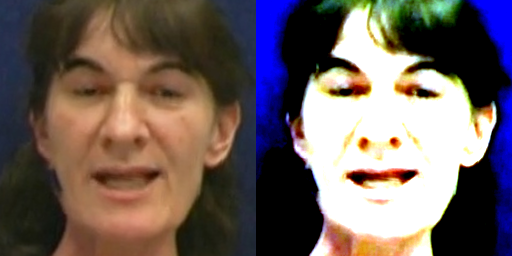

In [19]:
from google.colab.patches import cv2_imshow

res = np.hstack((orig_dataset[0],real_dataset[0]*255.+128)) 
cv2_imshow(res)

### Histogram normalization

In [20]:

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
print(orig_dataset.shape)
b,g,r = cv2.split(orig_dataset[0])
print(b.shape)

clahe_b = clahe.apply(b.astype(np.uint8))
clahe_g = clahe.apply(g.astype(np.uint8))
clahe_r = clahe.apply(r.astype(np.uint8))
hist_normalize =  cv2.merge((clahe_b, clahe_g, clahe_r))



(118, 256, 256, 3)
(256, 256)


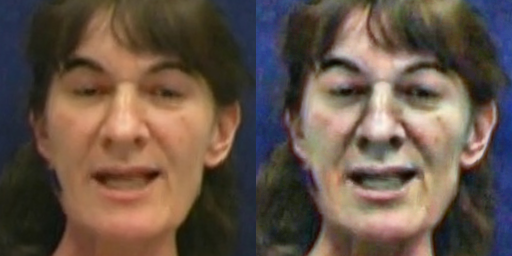

In [21]:
#Show side by side
res = np.hstack((orig_dataset[0],hist_normalize)) 
cv2_imshow(res)

### Normalize brightness and contrast

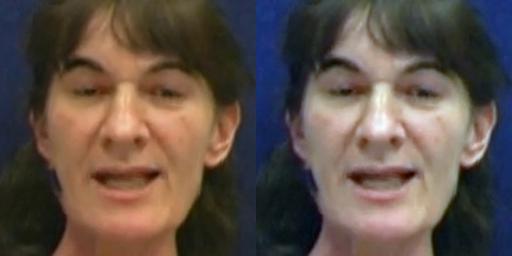

In [23]:
norm_img = np.zeros(b.shape)
norm_b = cv2.normalize(b, norm_img, 0, 255, cv2.NORM_MINMAX)
norm_g = cv2.normalize(g, norm_img, 0, 255, cv2.NORM_MINMAX)
norm_r = cv2.normalize(r, norm_img, 0, 255, cv2.NORM_MINMAX)

normalized = cv2.merge((norm_b, norm_g, norm_r))
res = np.hstack((orig_dataset[0],normalized)) 
cv2_imshow(res)